# 3. Thinking probabilistically-- Discrete variables

Kesimpulan statistik (*Statistical inference*) bersandar pada probabilitas. Karena kita jarang bisa mengatakan sesuatu yang bermakna dengan kepastian mutlak dari data, kita menggunakan bahasa probabilistik untuk membuat pernyataan kuantitatif tentang data. Dalam bab ini, Anda akan belajar cara berpikir secara probabilistik tentang jumlah diskrit: yang hanya dapat mengambil nilai tertentu, seperti bilangan bulat.

## Preparing Data and Library

In [1]:
# Import modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set default Seaborn style
sns.set()

## Probabilistic logic and statistical inference

### What is the goal of statistical inference?

Mengapa kita melakukan kesimpulan statistik?

* Untuk menarik kesimpulan probabilistik tentang apa yang mungkin kita harapkan jika kita mengumpulkan data yang sama lagi.
* Untuk menarik kesimpulan yang bisa ditindaklanjuti dari data.
* Untuk menarik kesimpulan yang lebih umum dari data atau pengamatan yang relatif sedikit.

**Note** : Kesimpulan statistik melibatkan pengambilan data Anda ke kesimpulan probabilistik tentang apa yang Anda harapkan jika Anda mengambil lebih banyak data, dan Anda dapat membuat keputusan berdasarkan kesimpulan ini.

### Why do we use the language of probability?

Manakah dari berikut ini yang bukan alasan mengapa kami menggunakan bahasa probabilistik dalam inferensi statistik?

* Probabilitas memberikan ukuran ketidakpastian.
* Data hampir tidak pernah persis sama ketika diperoleh kembali, dan probabilitas memungkinkan kita untuk mengatakan seberapa besar kita berharap mereka berbeda.

**Yang Bukan** :

* Bahasa probabilistik tidak terlalu tepat.

**Note** : Bahasa probabilistik sebenarnya sangat tepat. Ini justru menggambarkan ketidakpastian.

## Random number generators and hacker statistics

### Generating random numbers using the np.random module

Kami akan menggunakan modul `np.random` untuk sisa kursus ini dan sekuelnya. Sebenarnya, Anda mungkin akan memanggil fungsi dari modul ini lebih dari yang lain saat mengenakan topi ahli statistik hacker Anda. Mari kita mulai dengan mengambil fungsi yang paling sederhana, `np.random.random()` untuk tes putaran. Fungsi mengembalikan angka acak antara nol dan satu. Panggil `np.random.random()` beberapa kali di shell IPython. Anda akan melihat angka-angka berubah antara nol dan satu.

Dalam latihan ini, kami akan menghasilkan banyak angka acak antara nol dan satu, dan kemudian memplot hasilnya dengan histogram. Jika angkanya benar-benar acak, semua bar di histogram harus memiliki tinggi yang hampir sama.

Anda mungkin telah memperhatikan bahwa, dalam video, Justin menghasilkan 4 angka acak dengan menyertakan keyword argument `size=4` ke `np.random.random()`. Pendekatan semacam itu lebih efisien daripada `for` loop: dalam latihan ini, bagaimanapun, Anda akan menulis loop untuk pembelajaran statistik hacker sebagai praktik mengulang percobaan berulang-ulang.

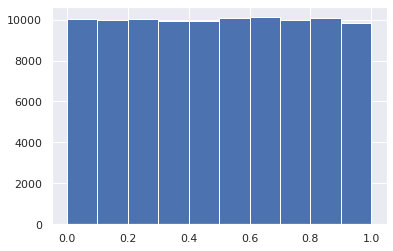

In [2]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.array(np.random.random())

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

**Note** : Histogram hampir persis rata di bagian atas, menunjukkan bahwa ada kemungkinan yang sama bahwa angka yang dihasilkan secara acak ada di salah satu bins histogram.

### The np.random module and Bernoulli trials

Anda dapat menganggap persidangan Bernoulli sebagai flip dari koin yang mungkin bias. Secara khusus, setiap flip koin memiliki probabilitas `p` pendaratan kepala (sukses) dan probabilitas `1 − p` pendaratan ekor (kegagalan).

Dalam latihan ini, Anda akan menulis fungsi untuk melakukan `n` percobaan Bernoulli, `perform_bernoulli_trials(n, p)`, yang mengembalikan jumlah keberhasilan dari `n` percobaan Bernoulli, yang masing-masing memiliki probabilitas `p` keberhasilan. Untuk melakukan setiap percobaan Bernoulli, gunakan fungsi `np.random.random()`, yang mengembalikan angka acak antara nol dan satu.

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?

Katakanlah bank membuat 100 pinjaman hipotek. Mungkin saja antara 0 dan 100 pinjaman akan gagal bayar. Anda ingin mengetahui probabilitas mendapatkan jumlah default yang diberikan, mengingat bahwa probabilitas default adalah `p = 0.05`.

Untuk menyelidiki ini, Anda akan melakukan simulasi. Anda akan melakukan 100 uji coba Bernoulli menggunakan fungsi `perform_bernoulli_trials()` yang Anda tulis dalam latihan sebelumnya dan mencatat berapa banyak default yang kami dapatkan.

Di sini, kesuksesan adalah standar. (Ingat bahwa kata "sukses" hanya berarti bahwa uji coba Bernoulli mengevaluasi ke `True`, yaitu, apakah penerima pinjaman gagal bayar?) Anda akan melakukan ini untuk 100 uji coba Bernoulli lainnya. Dan lagi dan lagi sampai kami telah mencobanya 1000 kali. Kemudian, Anda akan memplot histogram yang menggambarkan probabilitas jumlah default.

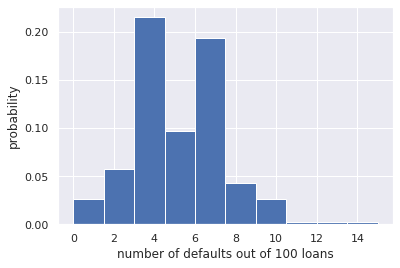

In [4]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

**Note** : Ini sebenarnya bukan cara yang optimal untuk memetakan histogram ketika hasilnya diketahui bilangan bulat. Kami akan meninjau kembali ini dalam latihan yang akan datang.

### Will the bank fail?

Plot jumlah default yang Anda dapatkan dari latihan sebelumnya, di namespace Anda yaitu `n_defaults`, sebagai CDF. Fungsi `ecdf()` yang Anda tulis di bab pertama tersedia.

Jika suku bunga sedemikian rupa sehingga bank akan kehilangan uang jika 10 atau lebih pinjamannya gagal bayar, berapakah probabilitas bahwa bank akan kehilangan uang?

In [5]:
# Computing the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

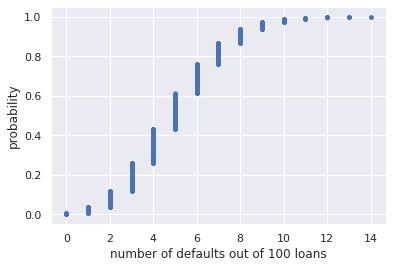

Probability of losing money = 0.0278


In [12]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

**Note** : Seperti yang mungkin kita harapkan, kemungkinan besar kita mendapatkan 5/100 default. Tapi kami masih memiliki peluang 2% untuk mendapatkan 10 atau lebih default dari 100 pinjaman.

## Probability distributions and stories: The Binomial distribution

### Sampling out of the Binomial distribution

Hitung fungsi massa probabilitas untuk jumlah default yang kami harapkan untuk 100 pinjaman seperti pada bagian terakhir, tetapi alih-alih mensimulasikan semua uji coba Bernoulli, lakukan pengambilan sampel menggunakan `np.random.binomial()`.

Ini identik dengan perhitungan yang Anda lakukan pada set latihan terakhir menggunakan fungsi `perform_bernoulli_trials()` yang ditulis khusus, tetapi jauh lebih efisien secara komputasi. Mengingat efisiensi ekstra ini, kami akan mengambil 10.000 sampel, bukan 1000. Setelah mengambil sampel, plot CDF sebagai yang terakhir kali. CDF yang Anda plotting adalah distribusi Binomial.

Catatan: Untuk latihan ini dan semua langkah selanjutnya, generator angka acak sudah di-seeded sebelumnya untuk Anda (dengan `np.random.seed(42)`) untuk menghemat Anda mengetik setiap kali.

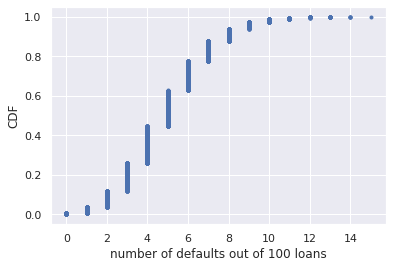

In [13]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

**Note** : Jika Anda tahu ceritanya, menggunakan algoritme bawaan untuk langsung mengambil sampel dari distribusi jauh lebih cepat.

### Plotting the Binomial PMF

Seperti disebutkan dalam video, plotting PMF yang terlihat bagus memerlukan sedikit modifikasi matplotlib yang tidak akan kita bahas di sini. Sebagai gantinya, kami akan plotting PMF dari distribusi Binomial sebagai histogram dengan keterampilan yang telah Anda pelajari.

Caranya adalah mengatur ujung `bins` ke `plt.hist()`. Kami ingin bins berpusat pada bilangan bulat. Jadi, ujung bins harus `-0,5, 0,5, 1,5, 2,5, ...` hingga `max(n_defaults) + 1.5`. Anda dapat menghasilkan array seperti ini menggunakan `np.arange()` dan kemudian mengurangi `0,5` dari array.

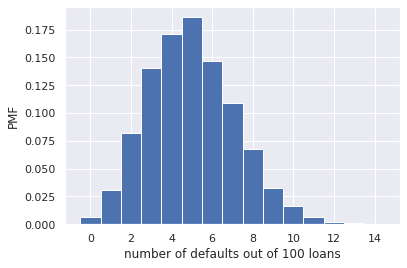

In [9]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

## Poisson processes and the Poisson distribution

### Relationship between Binomial and Poisson distributions

Anda baru saja mendengar bahwa distribusi Poisson adalah batas distribusi Binomial untuk peristiwa langka. Ini masuk akal jika Anda berpikir tentang cerita. Katakanlah kita melakukan uji coba Bernoulli setiap menit selama satu jam, masing-masing dengan probabilitas keberhasilan 0,1. Kami akan melakukan 60 percobaan, dan jumlah keberhasilan didistribusikan secara Binomially, dan kami berharap mendapatkan sekitar 6 keberhasilan. Ini seperti kisah Poisson yang kami diskusikan di video, di mana kami mendapatkan rata-rata 6 hit di situs web per jam.

Jadi, distribusi Poisson dengan tingkat kedatangan sama dengan `np` mendekati distribusi Binomial untuk uji coba `n` Bernoulli dengan probabilitas `p` keberhasilan (dengan `n` besar dan `p` kecil). Yang penting, distribusi Poisson seringkali lebih mudah untuk dikerjakan karena hanya memiliki satu parameter daripada dua untuk distribusi Binomial.

Mari kita jelajahi dua distribusi ini secara komputasi. Anda akan menghitung rata-rata dan standar deviasi sampel dari distribusi Poisson dengan tingkat kedatangan 10. Kemudian, Anda akan menghitung rata-rata dan standar deviasi sampel dari distribusi Binomial dengan parameter `n` dan `p` sehingga `np = 10`.

In [14]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(1000,0.01,10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0139 3.1787272279955068
n = 20 Binom: 10.0102 3.139919737827704
n = 100 Binom: 9.9905 3.142898304113577
n = 1000 Binom: 10.0168 3.158151003356236


**Note** : Berarti semuanya hampir sama, yang dapat terbukti benar dengan melakukan beberapa pekerjaan pena-dan-kertas. Standar deviasi dari distribusi Binomial semakin dekat dan lebih dekat dengan distribusi Poisson karena probabilitas `p` semakin rendah dan semakin rendah.

### How many no-hitters in a season?

Dalam bisbol, seorang yang tidak pemukul adalah permainan di mana seorang pelempar bola tidak memungkinkan tim lain terkena pukulan. Ini adalah peristiwa langka, dan sejak awal apa yang disebut era bisbol modern (mulai tahun 1901), hanya ada 251 di antaranya melalui musim 2015 di lebih dari 200.000 pertandingan. ECDF dari jumlah no-hitter dalam satu musim ditunjukkan di bawah ini. Distribusi probabilitas mana yang sesuai untuk menggambarkan jumlah orang yang no-hitter yang kita harapkan pada musim tertentu?

Catatan: Kumpulan data `no-hitter` di scraped dan dihitung dari set data yang tersedia di [retrosheet.org (lisensi)](http://www.retrosheet.org/).

![](images/no-hitter.svg)

**Answer** : Baik Binomial dan Poisson, meskipun Poisson lebih mudah untuk dimodelkan dan dihitung.

**Note** : Ketika kita memiliki peristiwa langka (p rendah, n tinggi), distribusi Binomial adalah Poisson. Ini memiliki parameter tunggal, jumlah rata-rata keberhasilan per interval waktu, dalam kasus kami jumlah rata-rata tidak ada pemukul per musim.

### Was 2015 anomalous?

1990 dan 2015 menampilkan yang paling hitter dari musim bisbol (ada tujuh). Mengingat ada rata-rata 251/115 no-hitter per musim, berapakah probabilitas memiliki tujuh atau lebih dalam satu musim?

In [15]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0066


**Note** : Hasilnya sekitar 0,007. Ini berarti bahwa tidak mungkin untuk melihat musim tanpa-pemukul 7 atau lebih dalam satu abad. Kami telah melihat dua dalam satu setengah abad, jadi itu tidak masuk akal.